In [ ]:
!pip install pyAgrum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 15.2 MB/s eta 0:00:00


In [ ]:
import pyAgrum as gum

In [ ]:
import pyAgrum.lib.notebook as gnb

In [ ]:
bn=gum.BayesNet('Obesity') #creating the Bayesian Network

In [ ]:
#adding all the variables and possible values
age = bn.add(gum.LabelizedVariable('Age', 'Age', ['Under 18','18 to 24', '25 to 34', '35 to 44', '45 to 54','55 to 65','65 and over']))
height = bn.add(gum.LabelizedVariable('Height (CM)', 'Height (CM)', ['150 to 159','160 to 169','170 to 179','180 and over']))
weight = bn.add(gum.LabelizedVariable('Weight (KG)', 'Weight (KG)', ['Under 50','50 to 59','60 to 69','70 to 79','80 to 89','90 to 99','Over 100']))
familyHistory = bn.add(gum.LabelizedVariable('Family History Overweight', 'Family History Overweight', ['no','yes']))
highCalorieFoods = bn.add(gum.LabelizedVariable('Eat High Caloric Food Frequently', 'Eat High Caloric Food Frequently', ['no','yes']))
vegatables = bn.add(gum.LabelizedVariable('Eat Vegatables during each Meal', 'Eat Vegatables during each Meal', ['1','2','3']))
mainMealsADay = bn.add(gum.LabelizedVariable('How Many Main Meals in a Day', 'How Many Main Meals in a Day', ['1','2','3','4']))
foodBetweenMeals = bn.add(gum.LabelizedVariable('Eat Any Food between Meals', 'Eat Any Food between Meals', ['rarely to sometimes','frequently to alot']))
monitor = bn.add(gum.LabelizedVariable('Monitor Daily Calories', 'Monitor Daily Calories', ['no','yes']))
physicalActivity = bn.add(gum.LabelizedVariable('How Often Physical Activity','How Often Physical Activity', ['No Physical Activity','Some Physical Activity','Good Amount of Physical Activity']))
tech = bn.add(gum.LabelizedVariable('How much time do you use technological devices', 'How much time do you use technological devices', ['Less than hour','1 to 2 hours','2 to 4 hours','4 to 6 hours','6 to 8 hours','More than 8 hours']))
alcohol = bn.add(gum.LabelizedVariable('Do you Drink Alcohol', 'Do you Drink Alcohol', ['no','yes']))
obesity = bn.add(gum.LabelizedVariable('Obesity Level', 'Obesity Level', ['Normal','Overweight','Obese']))

In [ ]:
links = [
    (alcohol,weight),
    (weight,obesity),
    (familyHistory,obesity),
    (physicalActivity,obesity),
    (physicalActivity,weight),
    (mainMealsADay,weight),
    (highCalorieFoods,weight),
    (tech,weight),
    (vegatables,weight),
    (height,weight),
    (monitor,highCalorieFoods),
    (foodBetweenMeals,mainMealsADay),
    (age,height),
    (age,weight),

]

# building the BN
for link in links:
    bn.addArc(*link)

# Verify the structure
print(bn)

BN{nodes: 13, arcs: 14, domainSize: 10^6.60898, dim: 145284, mem: 1Mo 300Ko 520o}


In [ ]:
bn

(pyAgrum.BayesNet<double>@0x56b72f237580) BN{nodes: 13, arcs: 14, domainSize: 10^6.60898, dim: 145284, mem: 1Mo 300Ko 520o}

In [ ]:
import pandas as pd
df = pd.read_csv('the path to the obesity.csv dataset')

# Learning the probabilities of Variables using the Dataset

In [ ]:
learner = gum.BNLearner(df, bn)
learner.useEM(1e-3)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

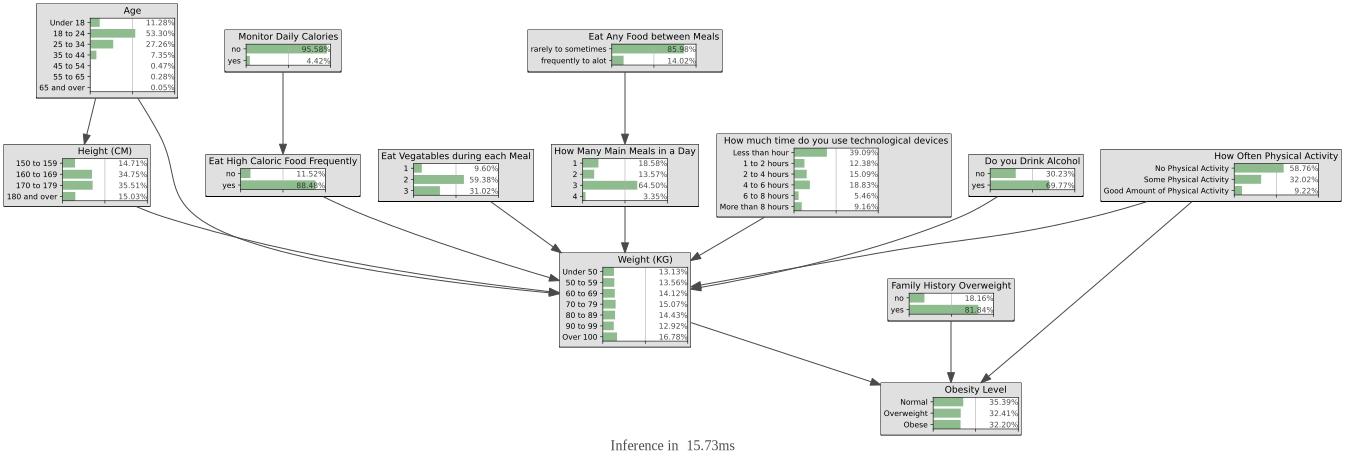

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showInference(bn,size="full")

*Lets make some inferences!*

In [ ]:
ie.setEvidence({'Weight (KG)':'70 to 79',
                'Family History Overweight':'no',
                'How Often Physical Activity':'Good Amount of Physical Activity',
                'How Many Main Meals in a Day':'3',
                'Eat Any Food between Meals':'rarely to sometimes',
                'Eat Vegatables during each Meal':'2',
                'Eat High Caloric Food Frequently':'yes',
                'Monitor Daily Calories':'no',
                'Height (CM)':'180 and over',
                'Do you Drink Alcohol':'yes',
                'How much time do you use technological devices':'More than 8 hours',
                'Age':'18 to 24'
                })

ie.makeInference()
ie.posterior(obesity)


(pyAgrum.Potential<double>@0x56b72fec62f0) 
  Obesity Level              |
Normal   |Overweigh|Obese    |
---------|---------|---------|
 0.5000  | 0.3750  | 0.1250  |

In [ ]:
ie.setEvidence({'Weight (KG)':'70 to 79',
                'Family History Overweight':'no',
                'How Often Physical Activity':'Some Physical Activity',
                'How Many Main Meals in a Day':'3',
                'Eat Any Food between Meals':'rarely to sometimes',
                'Eat Vegatables during each Meal':'3',
                'Eat High Caloric Food Frequently':'yes',
                'Monitor Daily Calories':'no',
                'Height (CM)':'170 to 179',
                'Do you Drink Alcohol':'no',
                'How much time do you use technological devices':'4 to 6 hours',
                'Age':'Under 18'
                })

ie.makeInference()
ie.posterior(obesity)

(pyAgrum.Potential<double>@0x56b72faa3630) 
  Obesity Level              |
Normal   |Overweigh|Obese    |
---------|---------|---------|
 0.5714  | 0.2857  | 0.1429  |

In [ ]:
ie.setEvidence({'Weight (KG)':'90 to 99',
                'Family History Overweight':'no',
                'How Often Physical Activity':'Some Physical Activity',
                'How Many Main Meals in a Day':'3',
                'Eat Any Food between Meals':'rarely to sometimes',
                'Eat Vegatables during each Meal':'3',
                'Eat High Caloric Food Frequently':'no',
                'Monitor Daily Calories':'no',
                'Height (CM)':'170 to 179',
                'Do you Drink Alcohol':'yes',
                'How much time do you use technological devices':'4 to 6 hours',
                'Age':'55 to 65'
                })

ie.makeInference()
ie.posterior(obesity)

(pyAgrum.Potential<double>@0x56b72f3e4ba0) 
  Obesity Level              |
Normal   |Overweigh|Obese    |
---------|---------|---------|
 0.2000  | 0.2000  | 0.6000  |

# How to determine if person if normal, overweight or obese

In [ ]:
def obesity_level(Normal,Overweight,Obese):
  '''
  A simple function to 'print' the level of obesity
  '''
  if Normal > Overweight and Obese:
    return 'Normal'
  elif Overweight > Normal and Obese:
    return 'Overweight'
  elif Obese > Normal and Obese:
    return 'Obese'


Normal = ie.posterior(obesity)[0]
Overweight = ie.posterior(obesity)[1]
Obese = ie.posterior(obesity)[2]
print(obesity_level(Normal,Overweight,Obese))


Obese


# Counterfactual Inference (What if?)

One of the benefits to Causal Machine Learning over Machine Learning is the ability to do Counterfactual Inference, i.e. what would happen if something changed.

This is useful for our use case for Obesity as it allows people to predict if their health can improve by changing lifestyle choices.

Below we have defined a patient that is heavy, sedentary, eats alot of food and is old.

In [ ]:


ie.setEvidence({'Weight (KG)':'Over 100',
                'How Often Physical Activity':'No Physical Activity',
                  'Family History Overweight':'yes',
                'How Many Main Meals in a Day':'3',
                'Eat Any Food between Meals':'rarely to sometimes',
                'Eat Vegatables during each Meal':'3',
                'Eat High Caloric Food Frequently':'yes',
                'Monitor Daily Calories':'no',
                'Height (CM)':'170 to 179',
                'Do you Drink Alcohol':'yes',
                'How much time do you use technological devices':'4 to 6 hours',
                'Age':'55 to 65',
                })

ie.makeInference()
ie.posterior(obesity)

#patient is obese

(pyAgrum.Potential<double>@0x56b72faa7120) 
  Obesity Level              |
Normal   |Overweigh|Obese    |
---------|---------|---------|
 0.0024  | 0.0095  | 0.9882  |

Here we have the same patient but now we are making a counterfactual inference and seeing if the situation would have changed if they started doing physical activity


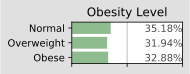

In [ ]:
import pyAgrum.causal as csl

cm=csl.CausalModel(bn)

pot=csl.counterfactual(cm = cm,
                       profile = {
               'Weight (KG)':'Over 100',
                'How Often Physical Activity':'No Physical Activity',
                  'Family History Overweight':'yes',
                'How Many Main Meals in a Day':'3',
                'Eat Any Food between Meals':'rarely to sometimes',
                'Eat Vegatables during each Meal':'3',
                'Eat High Caloric Food Frequently':'yes',
                'Monitor Daily Calories':'no',
                'Height (CM)':'170 to 179',
                'Do you Drink Alcohol':'yes',
                'How much time do you use technological devices':'4 to 6 hours',
                'Age':'55 to 65',
                'Obesity Level':'Obese'
                },whatif={'How Often Physical Activity'},
                       on={'Obesity Level'},
                       values = {'How Often Physical Activity':'Some Physical Activity'})

gnb.showProba(pot)
Normal = pot[0]
Overweight = pot[1]
Obese = pot[2]

#it is predicted they would not be obese if they did more physical activity